In [1]:
import pandas as pd
data=pd.read_csv("datasets/data.csv")
data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


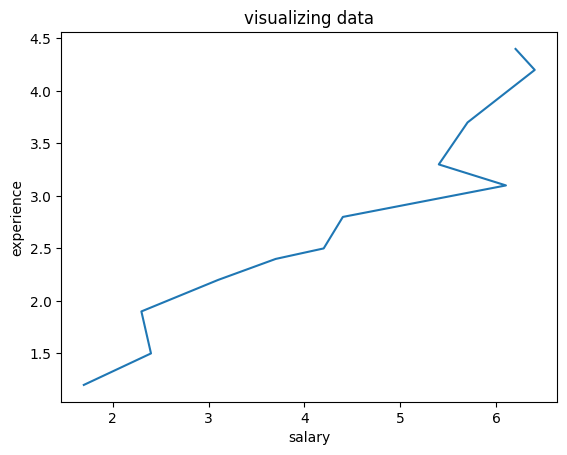

In [22]:
import matplotlib.pyplot as plt
plt.plot(data['salary'],data['experience'])
plt.xlabel('salary'),plt.ylabel('experience')
plt.title('visualizing data')
plt.show()

at the end of 5 epochs:
y= 0.6667615652333054 * x+ 0.22294598920173453


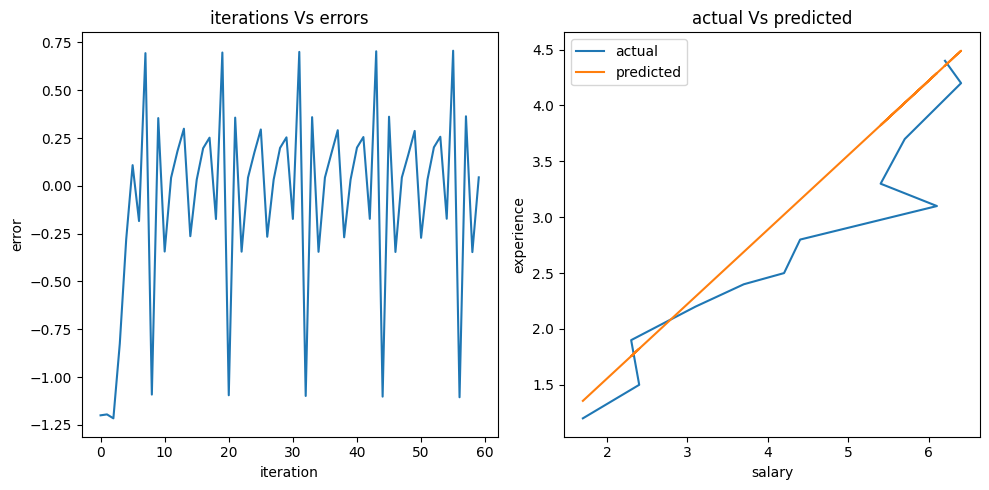

In [28]:
import matplotlib.pyplot as plt
import numpy as np
def StochasticGradientDescent(X,Y,epochs,alpha):
    x=np.array(X)
    y=np.array(Y)
    n=len(x)
    coef,inter=0,0
    coefficients,intercepts,errors=[],[],[]
    for epoch in range(epochs):
        for i in range(n):
            pred=coef*x[i]+inter
            err=pred-y[i]
            coef= coef - err * alpha * x[i]
            inter= inter - err*alpha
            coefficients.append(coef)
            intercepts.append(inter)
            errors.append(err)
    print(f"at the end of {epochs} epochs:\ny= {coef} * x+ {inter}")
    y_pred=coef*x+inter
    return errors,y_pred
epochs=5
alpha=0.05
errors,predictions=StochasticGradientDescent(data['salary'],data['experience'],epochs,alpha)
# print(errors)
iterations=[i for i in range(len(errors))]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(iterations,errors)
plt.xlabel('iteration'),plt.ylabel('error')
plt.title('iterations Vs errors')

plt.subplot(1,2,2)
plt.plot(data['salary'],data['experience'])
plt.plot(data['salary'],predictions)
plt.xlabel('salary'),plt.ylabel('experience')
plt.title('actual Vs predicted')
plt.legend(['actual','predicted'])
plt.tight_layout()
plt.show()

y= [0.61598633] * x+ [0.11844981]


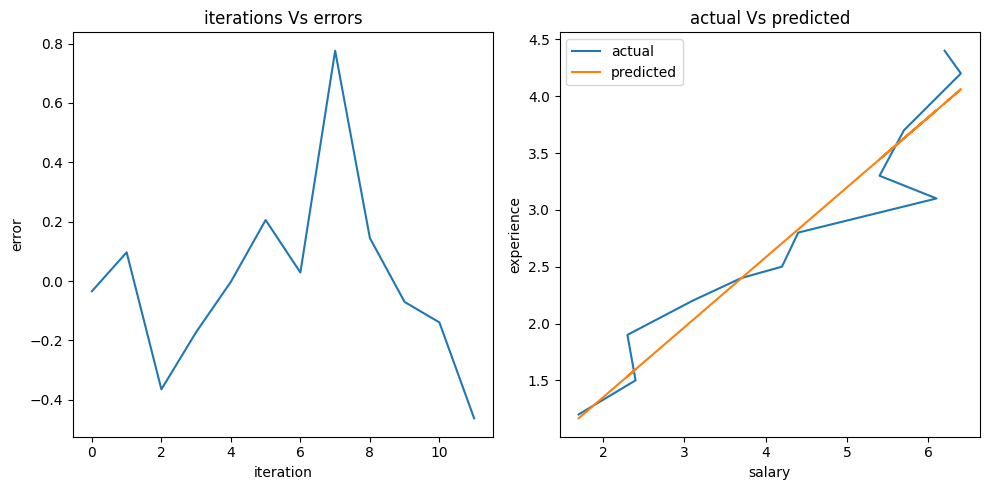

In [30]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
sk_x=np.array(data['salary']).reshape(-1,1)
sk_y=np.array(data['experience'])
epochs=5
alpha=0.05
model=SGDRegressor(loss='squared_error',penalty='l2',learning_rate='invscaling')
model.fit(sk_x,sk_y)
predictions=model.predict(sk_x)
errors=[]
for i in range(len(sk_y)):
    err=predictions[i]-sk_y[i]
    errors.append(err)
print(f"y= {model.coef_} * x+ {model.intercept_}")
iterations=[i for i in range(len(errors))]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(iterations,errors)
plt.xlabel('iteration'),plt.ylabel('error')
plt.title('iterations Vs errors')

plt.subplot(1,2,2)
plt.plot(data['salary'],data['experience'])
plt.plot(data['salary'],predictions)
plt.xlabel('salary'),plt.ylabel('experience')
plt.title('actual Vs predicted')
plt.legend(['actual','predicted'])
plt.tight_layout()
plt.show()